## Objective:

Train a neural network to classify movie reviews from the IMDb dataset as positive or negative.

* Dataset:
The dataset contains movie reviews with corresponding sentiments (positive or negative).
It's stored in a file named 'IMDB Dataset.csv'.

##### Instructions

Tools and Libraries Required:

Python
Pandas for data handling
Matplotlib and Seaborn for data visualization
NLTK for text preprocessing
Scikit-learn for machine learning utilities
TensorFlow/Keras for building and training neural network models
Steps:

* Data Loading and Exploration:
Load the data using Pandas.
Explore the dataset to understand the distribution of sentiments, the length of reviews, and other characteristics.
 
* Data Preprocessing:
Convert all reviews to lower case.
Remove HTML tags and URLs from reviews.
Tokenize the text and remove stop words.
Use TF-IDF Vectorization to convert text data into a format suitable for input into the neural network.
 
* Model Building:
Construct a Sequential model with Dense layers:
First layer: Dense, ReLU activation (input dimension should match the number of features from TF-IDF).
Hidden layers: experiment with different sizes and activations.
Output layer: Dense, Sigmoid activation (binary classification).
Compile the model with binary crossentropy loss and accuracy metrics.
 
* Model Training:
Train the model using the training set.
Use a validation split to monitor performance on unseen data during training.
Adjust parameters like the number of epochs and batch size as needed.
 
* Evaluation:
Evaluate the model on a separate test set to assess its performance.
Use metrics such as accuracy and loss.
 
* Visualization:
Plot training and validation loss over epochs.
Plot training and validation accuracy over epochs.
 
* Report:
Provide insights gained from the project.
Discuss any challenges faced and how they were overcome.
Suggest potential improvements for the model or preprocessing steps.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import re
import nltk

In [2]:
# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [3]:
# Loading IMDb dataset
df = pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
# Data Preprocessing Function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'http\S+|www\S+', '', text) 
    text = re.sub(r'[^a-zA-Z]', ' ', text) 
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

In [5]:
# Apply preprocessing
df['review'] = df['review'].apply(clean_text)

In [6]:
# Label Encoding
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [7]:
# Tokenization
max_words = 20000
max_len = 200 

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['review'])
sequences = tokenizer.texts_to_sequences(df['review'])
padded_sequences = pad_sequences(sequences, maxlen=max_len)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['sentiment'], test_size=0.2, random_state=42)

In [9]:
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [10]:
# Compile Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# Training the Model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [12]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 200s 308ms/step - accuracy: 0.7886 - loss: 0.4329 - val_accuracy: 0.8925 - val_loss: 0.2597
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 195s 311ms/step - accuracy: 0.9325 - loss: 0.1865 - val_accuracy: 0.8898 - val_loss: 0.2836
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 193s 309ms/step - accuracy: 0.9622 - loss: 0.1122 - val_accuracy: 0.8880 - val_loss: 0.3275
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 190s 305ms/step - accuracy: 0.9760 - loss: 0.0745 - val_accuracy: 0.8823 - val_loss: 0.4136


In [13]:
# Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 88ms/step - accuracy: 0.8949 - loss: 0.2547
Test Accuracy: 0.8925


Text(0.5, 1.0, 'Training vs Validation Accuracy')

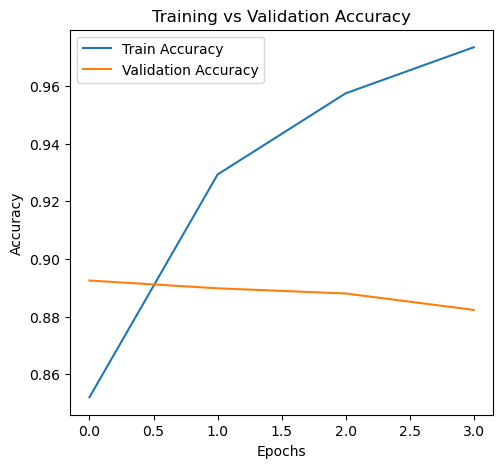

In [14]:
# Plot Accuracy & Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

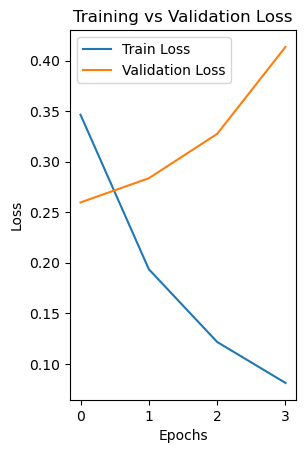

In [15]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()